# Analysis and Prediction of Black Friday Sales using Machine Learning Algorithms :

### _Black Friday is an informal name used to describe the day after Thanksgiving. It's often the busiest shopping day of the year because it kicks off the holiday season. This season is crucial for the economy, especially for some retailers, such as jewelers._


### _According to the National Retail Federation (NRF), 84.2 million people shopped in stores on Black Friday in 2019, and 37.8 million people shopped in stores on Thanksgiving Day. A total of 189.6 million people shopped over the four-day Black Friday weekend in 2019, a 14% increase over 2018.1 Black Friday wasn't the biggest shopping day of the year in 2019, though. That honor went to Super Saturday, which is the Saturday before Christmas._

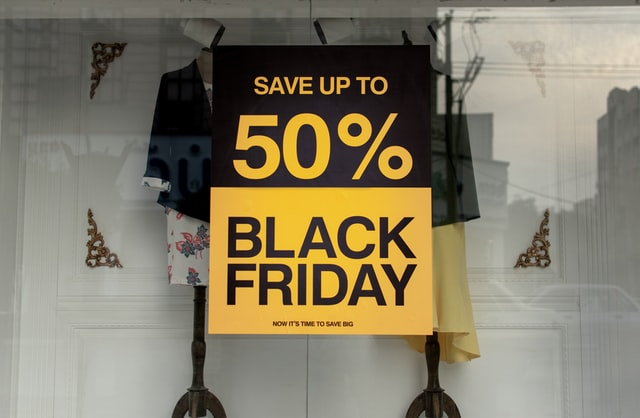

### _Black Friday is part of the holiday shopping season. Having a profitable Black Friday is essential for many retailers, especially toy and game stores. The holiday season amounts to almost 20% or more of annual sales for many retailers, according to the NRF._


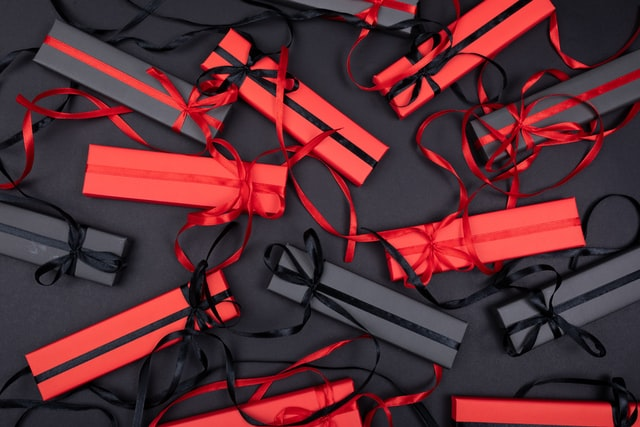

### _Some retailers start their Black Friday sales on Thanksgiving Day, and deals typically run throughout the weekend. In 2019, shoppers spent an average of 361.90 dollars from Thanksgiving through Cyber Monday (the first Monday after Thanksgiving). To put that into perspective, shoppers were expected to spend about 1,007 dollars each during the entire holiday season in 2018._

### _In 2020, shoppers plan to spend about a Thousand Dollars on gifts, decorations, food, and other purchases for themselves and their families._

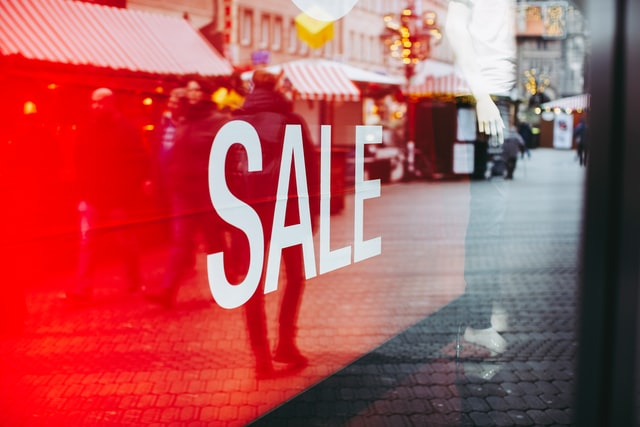

---

### _Importing Libraries_

In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### _Reading the Dataset_

In [4]:
df_train = pd.read_csv('black friday train.csv')

In [5]:
df_test = pd.read_csv('black friday test.csv')

In [6]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### _Checking for null values_

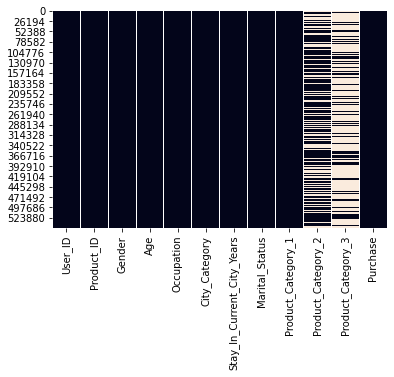

In [7]:
sns.heatmap(df_train.isnull(), cbar=False)

#### _Filling missing values :_

In [8]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

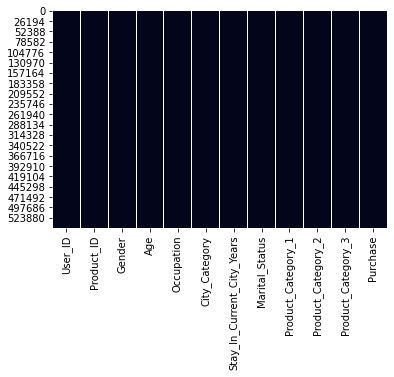

In [9]:
sns.heatmap(df_train.isnull(), cbar=False)

##### All missing values filled.
---

## _Exploratory Data Analysis and Visualizations :_ 

In [24]:
df_train.shape

(550068, 12)

In [21]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [10]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


##### Using Correlation to draw a Heatmap!

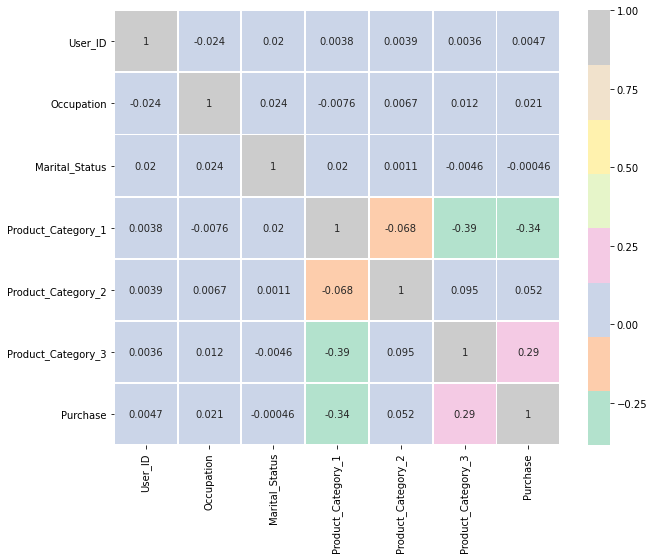

In [20]:
corrmat = df_train.corr()
corr_features = corrmat.index
plt.figure(figsize=(10,8))
g=sns.heatmap(df_train[corr_features].corr(),annot=True, linewidth =.9 , cmap="Pastel2")

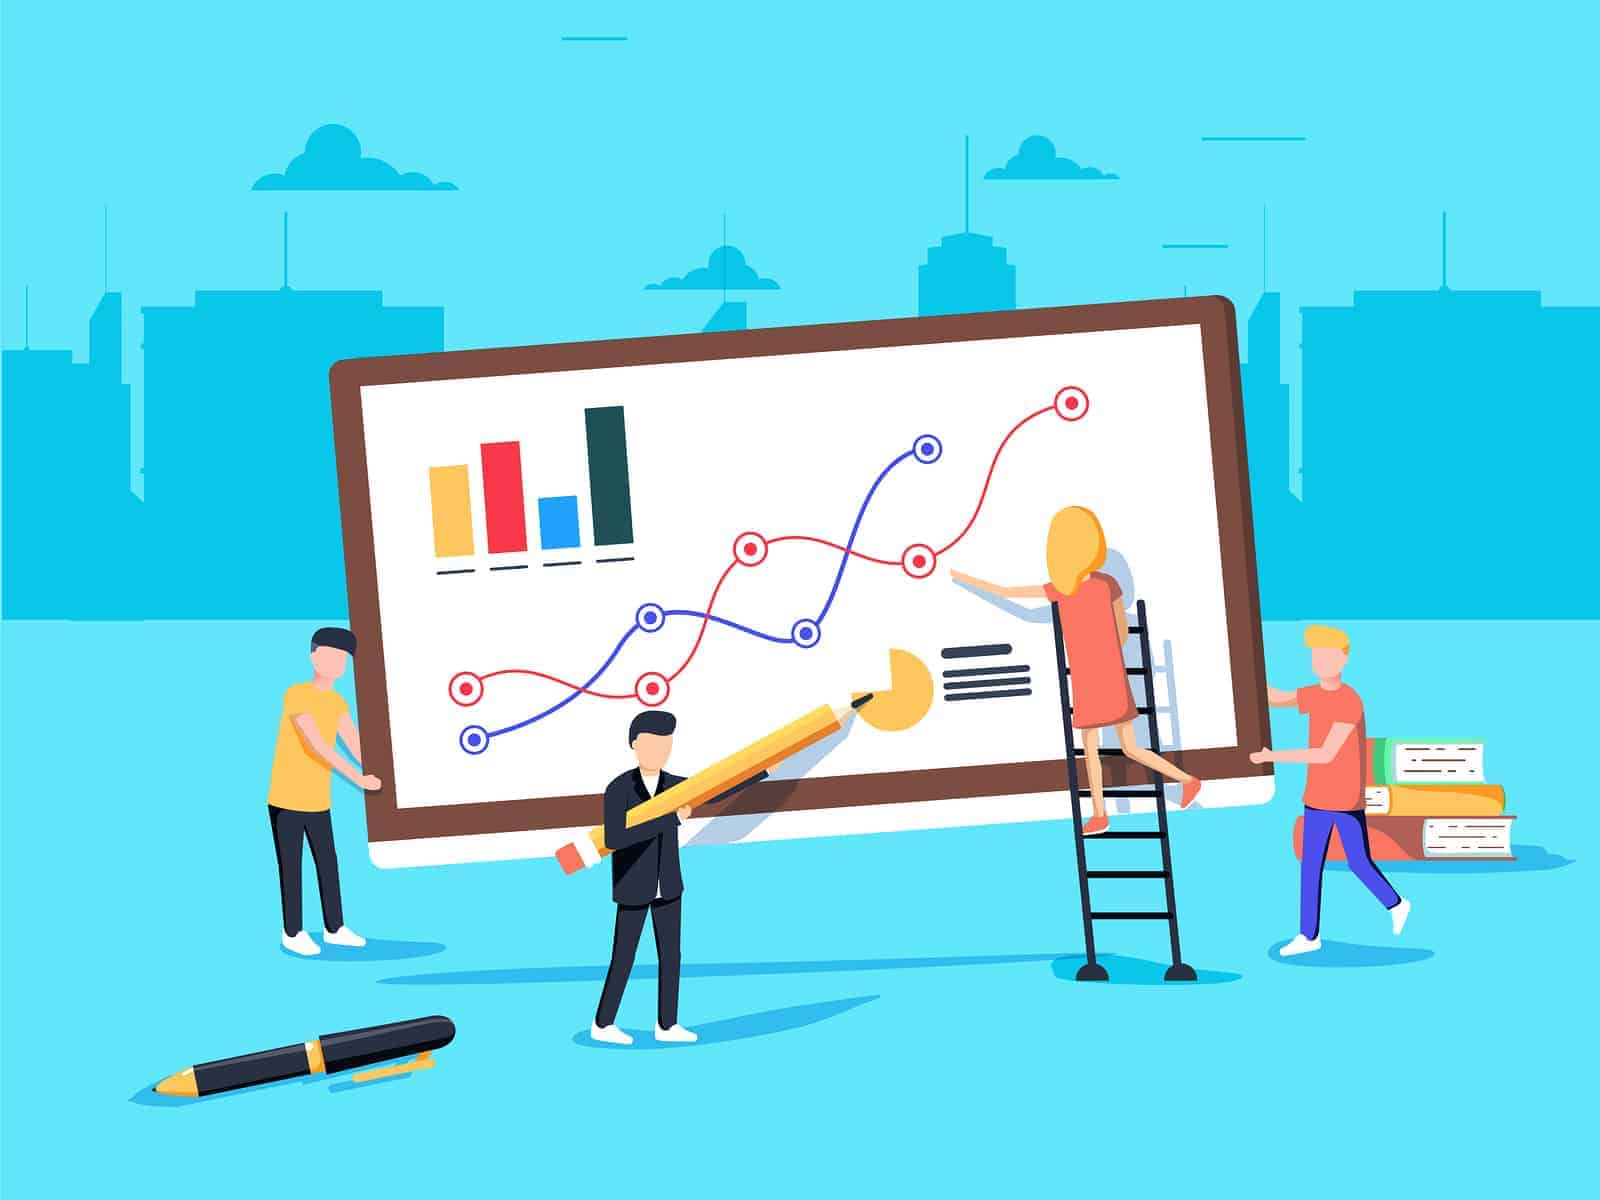

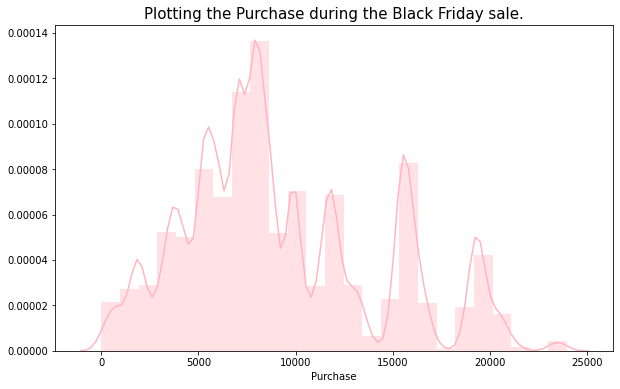

In [18]:
plt.figure(figsize=(10, 6))
plt.title('Plotting the Purchase during the Black Friday sale.', size = 15)
sns.distplot(df_train['Purchase'], bins=25 , color ='lightpink')

Text(0.5, 1.0, 'Diversity of the Ages of Customers.')

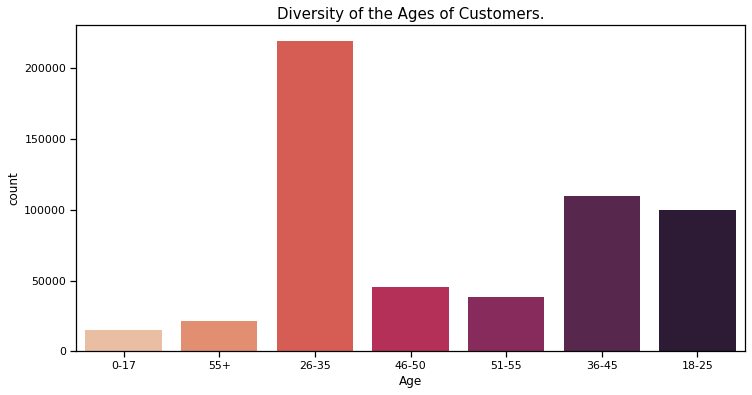

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age',data=df_train, palette='rocket_r')
sns.set_context('notebook')
plt.title("Diversity of the Ages of Customers.", size =15)

As from above, we can say that the youth customers are participating more in the Black Friday SALE.

Text(0.5, 1.0, 'Types of citites regarding customers.')

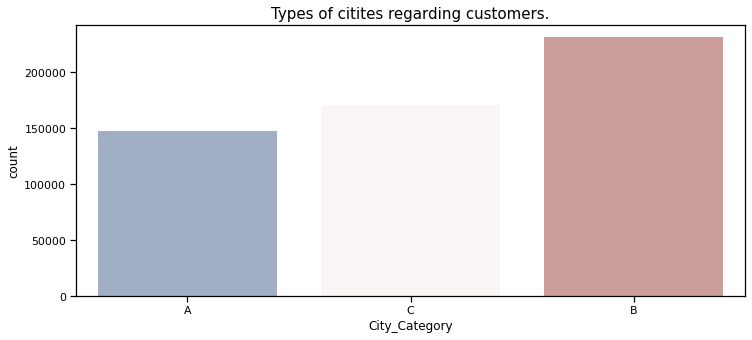

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(x='City_Category',data=df_train, palette='vlag')
sns.set_context('notebook')
plt.title("Types of citites regarding customers.", size =15)

Text(0.5, 1.0, 'Staying in the city for years more than...')

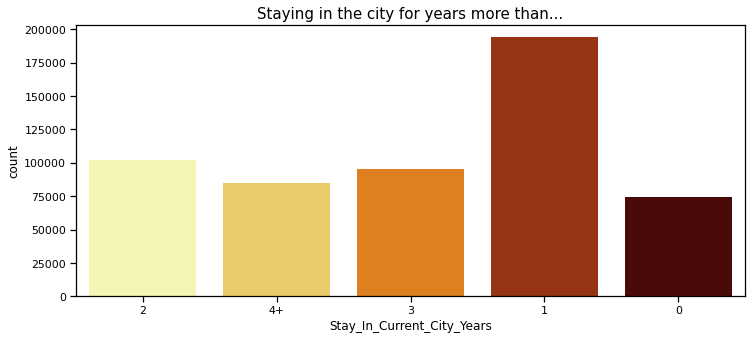

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(x='Stay_In_Current_City_Years',data=df_train, palette='afmhot_r')
sns.set_context('notebook')
plt.title("Staying in the city for years more than...", size =15)

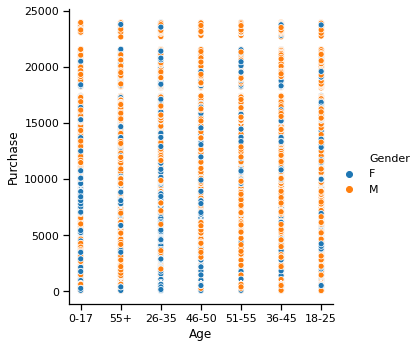

In [29]:
sns.relplot(x="Age", y="Purchase",hue = 'Gender', data=df_train);

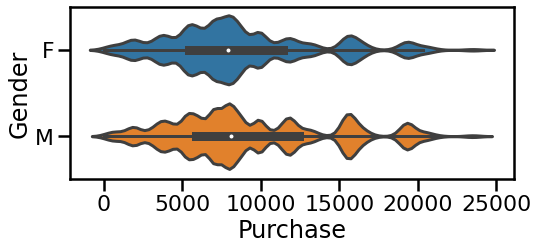

In [31]:
plt.figure(figsize=(8,4))
sns.set_context('poster')
sns.violinplot(y="Gender", x = "Purchase", data=df_train,
 inplace =True, inner ="box", )
plt.tight_layout()

---
## _Data Pre-Processing_

In [44]:
print(df_train.shape)
print(df_test.shape)

(550068, 12)
(233599, 11)


In [45]:
df_train['Age']=df_train['Age'].replace('0-17',17)
df_train['Age']=df_train['Age'].replace('18-25',25)
df_train['Age']=df_train['Age'].replace('26-35',35)
df_train['Age']=df_train['Age'].replace('36-45',45)
df_train['Age']=df_train['Age'].replace('46-50',50)
df_train['Age']=df_train['Age'].replace('51-55',55)
df_train['Age']=df_train['Age'].replace('55+',60)

In [46]:
df_test['Age']=df_test['Age'].replace('0-17',17)
df_test['Age']=df_test['Age'].replace('18-25',25)
df_test['Age']=df_test['Age'].replace('26-35',35)
df_test['Age']=df_test['Age'].replace('36-45',45)
df_test['Age']=df_test['Age'].replace('46-50',50)
df_test['Age']=df_test['Age'].replace('51-55',55)
df_test['Age']=df_test['Age'].replace('55+',60)

In [47]:
df_train['Stay_In_Current_City_Years']=df_train['Stay_In_Current_City_Years'].replace('4+',4)
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].replace('4+',4)

In [36]:
df_train['User_ID'] = df_train['User_ID'] - 1000000
df_test['User_ID'] = df_test['User_ID'] - 1000000

In [38]:
df_train['Product_ID'] = df_train['Product_ID'].str.replace('P00', '')
df_test['Product_ID'] = df_test['Product_ID'].str.replace('P00', '')

#### Using Label Encoder

In [37]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df_train['User_ID'] = enc.fit_transform(df_train['User_ID'])
df_test['User_ID'] = enc.transform(df_test['User_ID'])

#### Using Standard Scaler

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train['Product_ID'] = scaler.fit_transform(df_train['Product_ID'].values.reshape(-1, 1))
df_test['Product_ID'] = scaler.transform(df_test['Product_ID'].values.reshape(-1, 1))

##### Numerical and Categorical Column values :

In [48]:
categorical_column = ['Gender', 'City_Category']
numerical_column = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

In [51]:
encoder = LabelEncoder()
for col in categorical_column:
    df_train[col] = encoder.fit_transform(df_train[col])
    df_test[col] = encoder.transform(df_test[col])

In [53]:
scaler = StandardScaler()
for col in numerical_column:
    df_train[col] = scaler.fit_transform(df_train[col].values.reshape(-1, 1))
    df_test[col] = scaler.transform(df_test[col].values.reshape(-1, 1))

---
# Making the Model:

In [54]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,-1.028774,0,-2.059570,0.294864,0,0.109801,0,-0.610809,-1.083654,-0.614641,8370
1,0,0.722139,0,-2.059570,0.294864,0,0.109801,0,-1.118912,-0.118323,1.625106,15200
2,0,-0.845799,0,-2.059570,0.294864,0,0.109801,0,1.675656,-1.083654,-0.614641,1422
3,0,-0.869157,0,-2.059570,0.294864,0,0.109801,0,1.675656,1.168785,-0.614641,1057
4,1,1.077382,1,2.094842,1.214734,2,1.660861,0,0.659449,-1.083654,-0.614641,7969


In [56]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,3,-0.445785,1,1.128700,-0.165072,1,0.109801,1,-1.118912,0.686119,-0.614641
1,8,-0.596642,1,-0.320514,1.368046,2,-1.441258,0,-0.610809,-0.279212,-0.614641
2,9,1.106580,0,0.645628,-1.084943,1,1.660861,1,-0.102705,1.168785,-0.614641
3,9,-0.286169,0,0.645628,-1.084943,1,1.660861,1,-0.356757,0.364342,-0.614641
4,10,-1.176711,0,-0.320514,-1.084943,2,-0.665728,0,-0.356757,-0.279212,1.305142


## _Train-Test Split_

In [58]:
X = df_train.drop(['Purchase'], axis=1)
y = df_train[['Purchase']]
X_test = df_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Training the Model :

---
---
# _Using Linear Regression:_
---

In [59]:
from sklearn import linear_model

In [60]:
linreg =linear_model.LinearRegression()
linreg_model = linreg.fit(X_train,y_train)

In [61]:
linreg_pred =linreg_model.predict(X_test)

In [62]:
linreg_pred

array([[12694.75915731],
       [12140.83601333],
       [ 7374.13447087],
       ...,
       [ 7690.01009864],
       [ 8555.09015908],
       [ 8505.14136433]])

### _Plotting the Prediction of Linear Regression Model_

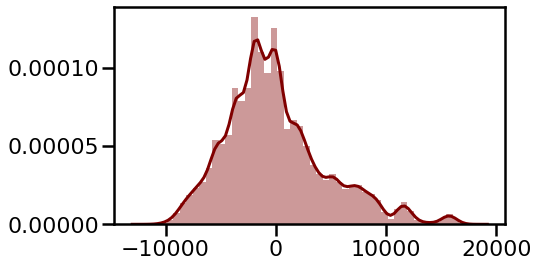

In [65]:
plt.figure(figsize=(7,4))
sns.distplot(y_test-linreg_pred, color ="maroon")

In [66]:
from sklearn import metrics

In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, linreg_pred))

Mean Absolute Error: 3520.3187731869903


In [69]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, linreg_pred)))

Root Mean Squared Error: 4609.769799176727


---
---
# _Using Random Forest Regressor:_
---

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf = RandomForestRegressor(n_jobs=-1)
rf_model = rf.fit(X_train,y_train)

D:\Software\Anaconda Ankur\Files\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [75]:
rf_pred =rf_model.predict(X_test)

In [76]:
rf_pred

array([13531.49, 15071.69,  8124.38, ...,  6098.5 ,  3243.62,  9636.3 ])

### _Plotting the Prediction of Random Forest Regression Model_

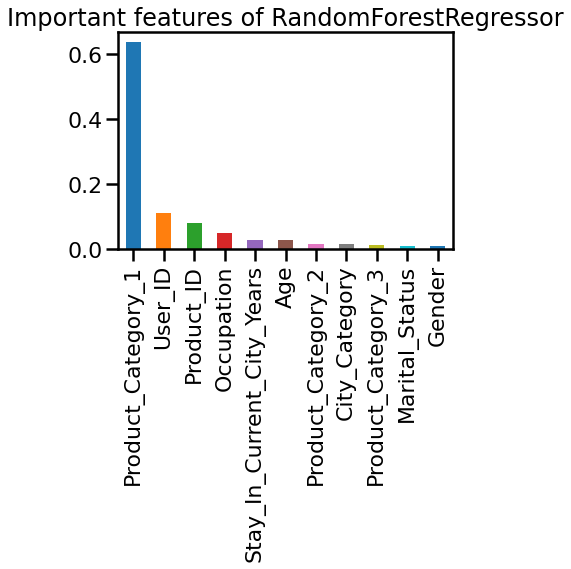

In [79]:
rf_features = pd.Series(rf_model.feature_importances_, X.columns).sort_values(ascending=False)
rf_features.plot(kind='bar', title='Important features of RandomForestRegressor')

In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))

Mean Absolute Error: 2021.9511101314379


In [81]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Root Mean Squared Error: 2752.697563557342


---
---
# _Using XGBoost Regressor:_
---

In [85]:
from xgboost import XGBRegressor

In [86]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

In [87]:
xgb_model = xgb_reg.fit(X_train, y_train)

In [88]:
xgb_pred =xgb_model.predict(X_test)

In [89]:
xgb_pred

array([14441.351 , 16195.175 ,  7789.5576, ...,  6916.236 ,  6411.892 ,
        8252.8125], dtype=float32)

### _Plotting the Prediction of XGBoost Regression Model_

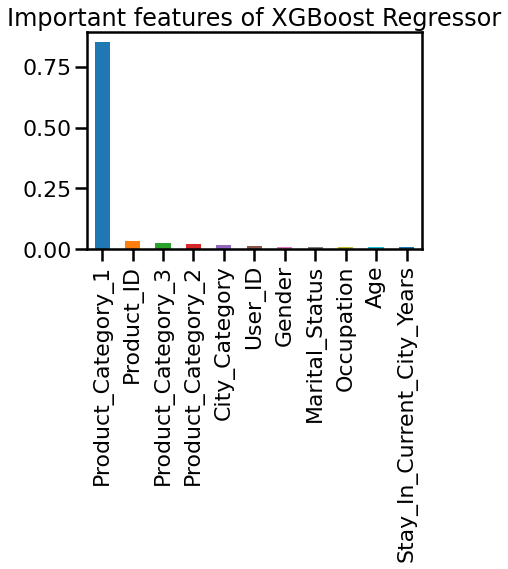

In [91]:
xgb_features = pd.Series(xgb_model.feature_importances_, X.columns).sort_values(ascending=False)
xgb_features.plot(kind='bar', title='Important features of XGBoost Regressor')

In [92]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, xgb_pred))

Mean Absolute Error: 1921.3264914125284


In [93]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

Root Mean Squared Error: 2591.851957429727


---
---
---

# _Conclusion :_

### _I have done Analysis as well as visualization of the Dataset. <br> And I have Trained the model using:_
- ### _Linear Regression_
- ### _Random Forest Regressior_
- ### _XGBoost Regressor_

---
## _From the above three trained Models, It can be seen that  <br><br> the XGBoost Regressor model performed better than theRandomForestRegressor and Linear Regressor Model._